# 12.4.3 Models with increments

The following scripts are dedicated to:
- the simulation of the paths of a degradation process with exponentially distributed increments
- the statistical properties of the increments of a degradation process with exponentially distributed increments
- the simulation of the paths of a homogeneous gamma process
- the statistical properties of the increments of a degradation process with gamma distributed increments
- the empirical distribution of the increment of a gamma process 
- the distribution(s) of the hitting time of a gamma process (RUL)
    
## Degradation process with exponetially distributed increments

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

### Parameters

In [2]:
# Deterioration rate
lambd = 5
# Window of sampling frequency
# Time parameters
tStart = 0
tEnd = 10
# Sampling frequency window
fs = np.array([1, 1])
# Number of histories
nbHist = 100000

### Time vector

In the cell below a time vector with random intervals drawn randomly from an uniform law between lower and upper bounds of the sampling frequency window. To set a constant interval, specify an upper bound equal to the lower one (e.g. `fs = np.array([1, 1])`).


In [3]:
# Time:
dt = np.array([tStart])
while np.sum(dt)<tEnd:
    dt = np.append(dt, 1/np.random.uniform(low=fs[0], high=fs[1]))
t = np.cumsum(dt)

### Drawn of several paths (associated to the same time sampling)

In [4]:
# Rate definition 
rate = lambd/(dt[1:].reshape(dt[1:].shape[0], 1)*np.ones((1, nbHist)))
# Drawn of increments 
I = np.random.exponential(scale=1/rate)
I = np.concatenate((np.zeros((1, nbHist)), I), axis=0)
# Degradation calculation
Y = np.cumsum(I, axis=0)

<IPython.core.display.Javascript object>


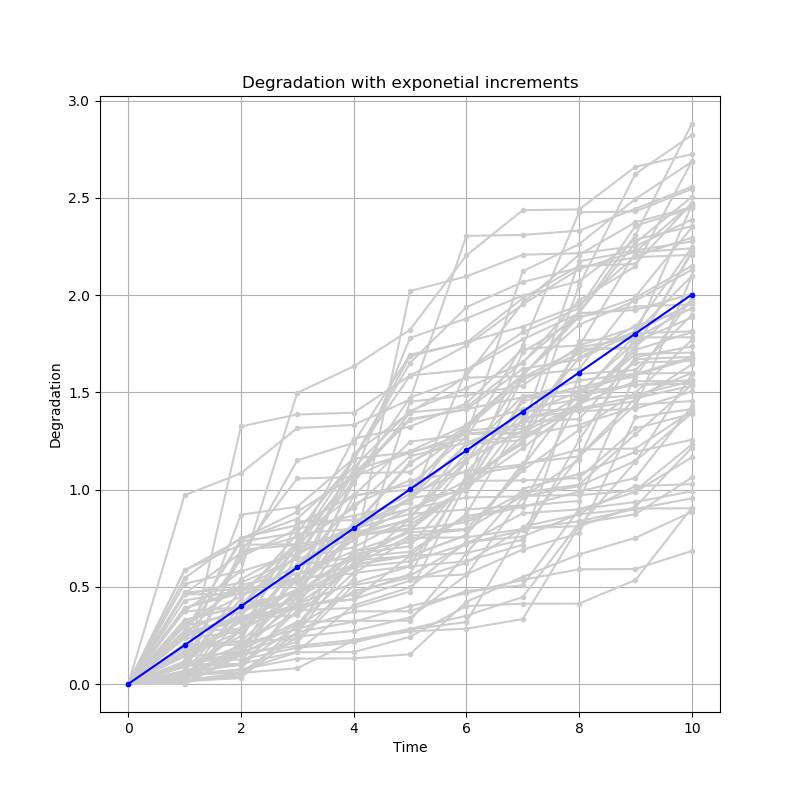

In [5]:
# Illustration
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for id in range(np.minimum(75, nbHist)):
    ax.plot(t, Y[:, id], '.-', color=(0.8, 0.8, 0.8))
ax.plot(t, np.mean(Y, axis=1), '.-', color=(0, 0, 1))
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
ax.set_title('Degradation with exponetial increments')
ax.grid(True)
fig.show()

### Statistical properties (rather obvious since they correspond to the way how the increments have been defined)
$\mathrm{E}[I(t_1,t_2)] = (t_2-t_1)/\lambda$


In [6]:
idMin = int(np.floor(len(t)*0.2))
idMax = int(np.floor(len(t)*0.8))
print('{:f} ≃ {:f}'.format(np.mean(I[idMin,:]), (t[idMin]-t[idMin-1])/lambd))
print('{:f} ≃ {:f}'.format(np.mean(I[idMax,:]), (t[idMax]-t[idMax-1])/lambd))

0.199617 ≃ 0.200000
0.201300 ≃ 0.200000


$\mathrm{var}[I(t_1,t_2)] = (t_2-t_1)^2/\lambda^2$

In [7]:
print('{:f} ≃ {:f}'.format(np.var(I[idMin,:]), (t[idMin]-t[idMin-1])**2/lambd**2))
print('{:f} ≃ {:f}'.format(np.var(I[idMax,:]), (t[idMax]-t[idMax-1])**2/lambd**2))

0.039754 ≃ 0.040000
0.040406 ≃ 0.040000


---
## Homogeneous gamma process

In [8]:
%reset -f
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

### Parameters

In [9]:
# Deterioration parameters
alpha = 5 # a coefficient of the shape parameter 
beta = 6 # the rate parameter (equals to 1/theta, where theta is the scale parameter)
# Time parameters
tStart = 0
tEnd = 10
# Sampling frequency window
fs = np.array([2, 5])
# Number of histories
nbHist = 100000

### Time vector

In the cell below a time vector with random intervals drawn randomly from an uniform law between lower and upper bounds of the sampling frequency window. To set a constant interval, specify an upper bound equal to the lower one (e.g. `fs = np.array([1, 1])`).

In [10]:
# Time:
dt = np.array([tStart])
while np.sum(dt)<tEnd:
    dt = np.append(dt, 1/np.random.uniform(low=fs[0], high=fs[1]))
t = np.cumsum(dt)

### Drawn of several paths (associated to the same time sampling)

In [11]:
# Shape parameter 
k = alpha*(dt[1:].reshape(dt[1:].shape[0], 1)*np.ones((1, nbHist)))
# Drawn of increments 
I = np.random.gamma(shape=k, scale=1/beta)
I = np.concatenate((np.zeros((1, nbHist)), I), axis=0)
# Degradation calculation
Y = np.cumsum(I, axis=0)

<IPython.core.display.Javascript object>


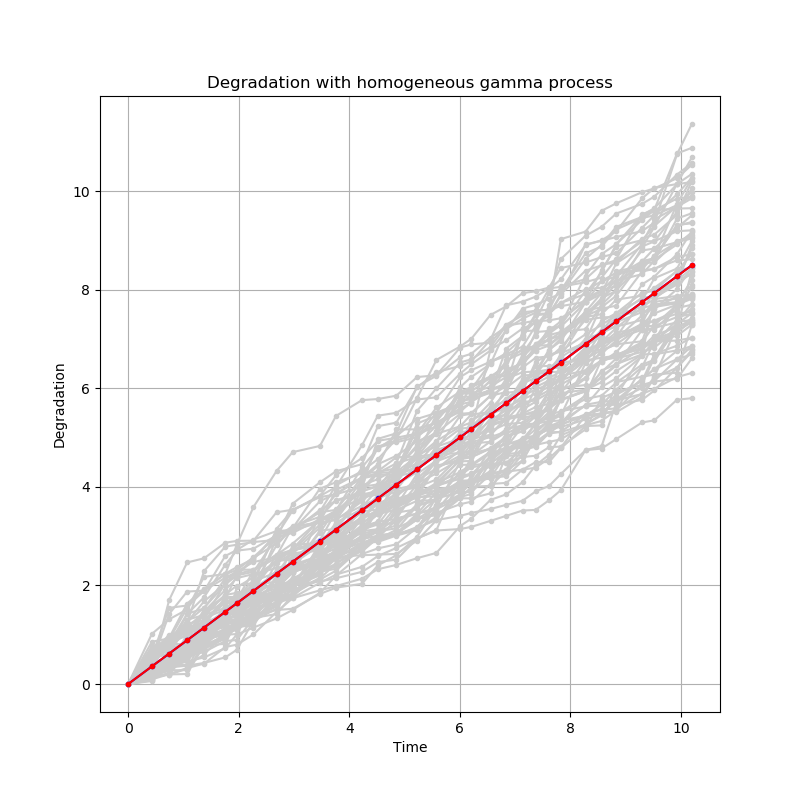

In [12]:
# Illustration
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for id in range(np.minimum(75, nbHist)):
    ax.plot(t, Y[:, id], '.-', color=(0.8, 0.8, 0.8))
ax.plot(t, np.mean(Y, axis=1), '.-', color=(0, 0, 1))
ax.plot(t, alpha/beta*t, '.-', color=(1, 0, 0))
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
ax.set_title('Degradation with homogeneous gamma process')
ax.grid(True)
fig.show()

### Statistical properties
$\mathrm{E}[Y(t_2)-Y(t_1)]=\mathrm{E}[I(t_1, t_2)] = \alpha (t_2-t_1)/{\beta}$

In [13]:
idMin = int(np.floor(len(t)*0.2))
idMax = int(np.floor(len(t)*0.8))
print('{:f} = {:f} ≃ {:f}'.format(np.mean(Y[idMin,:]-Y[idMin-1,:]),
                                  np.mean(I[idMin,:]),
                                  alpha*(t[idMin]-t[idMin-1])/beta))
print('{:f} = {:f} ≃ {:f}'.format(np.mean(Y[idMax,:]-Y[idMax-1,:]),
                                  np.mean(I[idMax,:]),
                                  alpha*(t[idMax]-t[idMax-1])/beta))

0.174795 = 0.174795 ≃ 0.174886
0.372415 = 0.372415 ≃ 0.371777


$\mathrm{var}[Y(t_2)-Y(t_1)]=\mathrm{var}[I(t_1, t_2)] = \alpha (t_2-t_1)/\beta^2$

In [14]:
idMin = int(np.floor(len(t)*0.2))
idMax = int(np.floor(len(t)*0.8))
print('{:f} = {:f} ≃ {:f}'.format(np.var(Y[idMin,:]-Y[idMin-1,:]),
                                  np.var(I[idMin,:]),
                                  alpha*(t[idMin]-t[idMin-1])/(beta**2)))
print('{:f} = {:f} ≃ {:f}'.format(np.var(Y[idMax,:]-Y[idMax-1,:]),
                                  np.var(I[idMax,:]),
                                  alpha*(t[idMax]-t[idMax-1])/(beta**2)))

0.029241 = 0.029241 ≃ 0.029148
0.062273 = 0.062273 ≃ 0.061963


---
## Homogeneous gamma process: focus on the increment distribution

In [15]:
%reset -f
import numpy as np
from scipy.stats import gamma

%matplotlib notebook
import matplotlib.pyplot as plt

### Parameters

In [16]:
# Deterioration parameters
alpha = 5 # a coefficient of the shape parameter 
beta = 6 # the rate parameter (equals to 1/theta, where theta is the scale parameter)
# Time parameters
tStart = 0
tEnd = 5
# Sampling frequency
fs = 2

### Time and a single history

Note that a constant sampling frequency is assumed here.

In [17]:
# Time vector
t = np.linspace(tStart, tEnd, int((tEnd-tStart)*fs)+1)
# Draw degradation increments
I = np.random.gamma(shape=alpha/fs, scale=1/beta, size=(t.shape[0]-1,))
I = np.concatenate(([0], I), axis=0)
# Degradation calculation
Y = np.cumsum(I, axis=0)
yLimS = Y[-1]+2*alpha/(beta**2)

### Illustration of the increments distributions

<IPython.core.display.Javascript object>


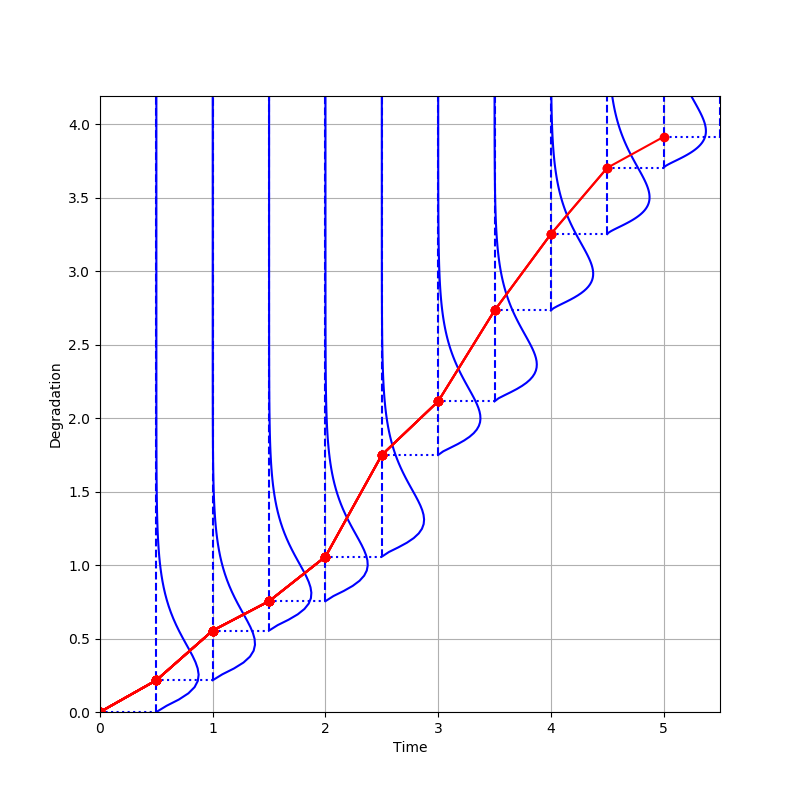

In [18]:
# Figure framwork
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([t[0], t[-1]+1/fs])
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
# Loop illustrating the increments distribution depending on time 
for id in range(len(Y)):
    ax.plot(t[0:id], Y[0:id], 'o-', color=(1, 0, 0))
    ax.plot([t[id], t[id]+1/fs], [Y[id], Y[id]], ':', color=(0, 0, 1))
    y = np.linspace(Y[id], yLimS, 100)
    z = gamma.pdf(y-Y[id], a=alpha/fs, scale=1/beta)
    z = z/z.max()*(t[1]-t[0])*0.75
    ax.plot([t[id]+1/fs, t[id]+1/fs], [y[0], y[-1]], '--', color=(0, 0, 1))
    ax.plot(z+t[id]+1/fs, y, '-', color=(0, 0, 1))
    ax.set_ylim([0, yLimS])
ax.plot(t, Y, 'o-', color=(1, 0, 0))
fig.show()

---
## Distribution of RUL

In [19]:
%reset -f
import numpy as np
import numpy.matlib
from scipy.stats import gamma

%matplotlib notebook
import matplotlib.pyplot as plt

### Parameters

In [20]:
# Deterioration parameters
alpha = 2 # a coefficient of the shape parameter 
beta = 2 # the rate parameter (equals to 1/theta, where theta is the scale parameter)
# Window of sampling frequency
# Time parameters
tStart = 0
tEnd = 100
# Sampling frequency
fs = 2
# Number of histories
nbHist = 1000
# Failure level
l = 70
# Flag "specific" history
flagSpec = True
tMeas = 55

### Time vector and drawn of several paths 

Note that a constant sampling frequency is assumed here. Therefore, parameter `alpha` is directly used in the function that draws sample from the Gamma distribution. 

In [21]:
# Time vector
t = np.linspace(tStart, tEnd, int((tEnd-tStart)*fs)+1)
# Draw degradation increments
I = np.random.gamma(shape=alpha/fs, scale=1/beta, size=(t.shape[0]-1, nbHist))
I = np.concatenate((np.zeros((1, nbHist)), I), axis=0)
# Degradation calculation
Y = np.cumsum(I, axis=0)
# Same process for the "specific" history
if flagSpec:
    ISpec1 = np.random.gamma(shape=alpha/fs, scale=1/beta,  size=(np.sum(t<=tMeas)-1, 1))
    ISpec2 = np.random.gamma(shape=alpha/fs, scale=1/beta,  size=(np.sum(t>tMeas), nbHist))
    ISpec = np.concatenate((np.zeros((1, nbHist)), np.matlib.repmat(ISpec1, 1, nbHist), ISpec2), axis=0)
    YSpec = np.cumsum(ISpec, axis=0)

### Calculation of the failure threshold hitting time

**CAUTION:** for the sake of simplicity, it is assumed that the failure level `l` is lower than the sum of simulated increments, if not, the cell below will raise a message.

The *exact* reaching time is obtained through a linear hypothesis.

In [22]:
if np.sum(Y[-1,:]<l)>0:
    print('WARNING: Increase the trajectory duration')

In [23]:
indMax = np.argmax(Y*(Y<l), axis=0)
thTime = np.zeros((nbHist,))
for idh in range(nbHist):
    a = (Y[indMax[idh]+1, idh]-Y[indMax[idh], idh])*fs
    thTime[idh] = t[indMax[idh]]+(l-Y[indMax[idh], idh])/a
if flagSpec:
    indMaxSpec = np.argmax(YSpec*(YSpec<l), axis=0)
    thTimeSpec = np.zeros((nbHist,))
    for idh in range(nbHist):
        aSpec = (YSpec[indMaxSpec[idh]+1, idh]-YSpec[indMaxSpec[idh], idh])*fs
        thTimeSpec[idh] = t[indMaxSpec[idh]]+(l-YSpec[indMaxSpec[idh], idh])/aSpec

### Illustration of trajectories and hitting time at the level `l`

Distributions of the hitting times are estimated, by simulations, and are given through histograms while true distributions are given through an analytical development relying on equation 12.40 (p. 537). 

<IPython.core.display.Javascript object>


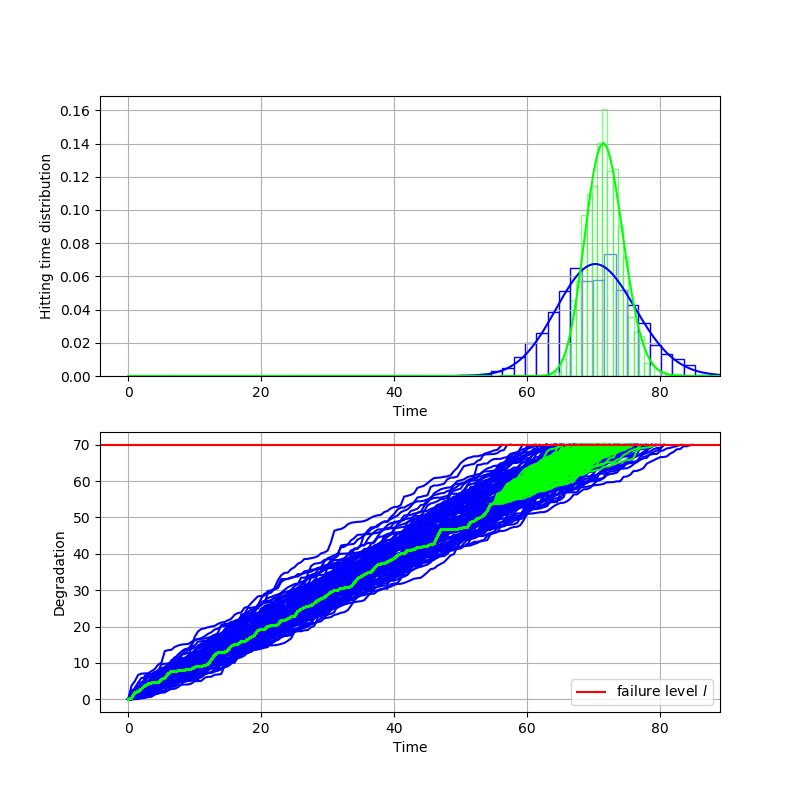

In [24]:
# Figure framework
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 1, 2)
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
# Plot trajectories
for idh in range(np.minimum(100, nbHist)):
    ax.plot(np.concatenate((t[0:indMax[idh]], np.array([thTime[idh]]))),
            np.concatenate((Y[0:indMax[idh], idh], np.array([l]))), 
            '-', color=(0, 0, 1))
if flagSpec:
    for idh in range(np.minimum(100, nbHist)):
        ax.plot(np.concatenate((t[0:indMaxSpec[idh]], np.array([thTimeSpec[idh]]))),
                np.concatenate((YSpec[0:indMaxSpec[idh], idh], np.array([l]))), 
                '-', color=(0, 1, 0))
xlim = ax.get_xlim()
ax.plot(xlim, [l, l], 'r-', label='failure level $l$')
ax.set_xlim(xlim)
ax.legend()
ax.grid(True)
# Histogram of the hitting time
ax = fig.add_subplot(2, 1, 1) 
ax.hist(thTime, bins=25, density=True, edgecolor=(0, 0, 1), facecolor=(1, 1, 1))
if flagSpec:
    ax.hist(thTimeSpec, bins=25, density=True, alpha=0.5, edgecolor=(0, 1, 0),
            facecolor=(1, 1, 1))
ax.set_xlabel('Time')
ax.set_ylabel('Hitting time distribution')
ax.set_xlim(xlim)
ax.grid(True)
# Distribution of the hitting time
cumDist = -gamma.cdf(l, a=alpha*t, scale=1/beta)
cumDist = np.concatenate((np.array([0]), np.diff(cumDist)*fs))
ax.plot(t, cumDist, '-', color=(0, 0, 1))
if flagSpec:
    cumDist = np.zeros(t.shape);
    cumDist[t>=tMeas] = -gamma.cdf(l-np.max(YSpec[t<=tMeas, 0]), 
                                   a=alpha*(t[t>=tMeas]-tMeas), scale=1/beta)
    cumDist = np.concatenate((np.array([0]), np.diff(cumDist)*fs))
    ax.plot(t, cumDist, '-', color=(0, 1, 0))